Variant 10 made by Krocha Kirill (group K-10) Teacher-Yefremov

#1

In [2]:
import networkx as nx
import matplotlib.pyplot as plt


graph = nx.Graph()
graph.add_edges_from([(1,2),(1,3),(3,4),(2,3),(2,4),(1,4),(5,6),(5,7),(5,8),(7,8),(7,6)])
graph.add_nodes_from([9,10,11])
fname='graph.txt'
nx.write_adjlist(graph,fname)

#2

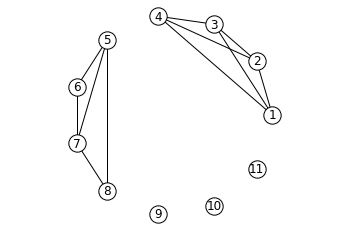

In [5]:
g = nx.Graph()
g = nx.read_adjlist('graph.txt', nodetype=int)
plt.axes().set_aspect('equal', adjustable='datalim')
nx.draw_circular(g, with_labels=True,font_color='black', node_color = 'white', edgecolors = 'black')
plt.savefig("mygraph.png", format = 'png' )
plt.show()
plt.close()

#3

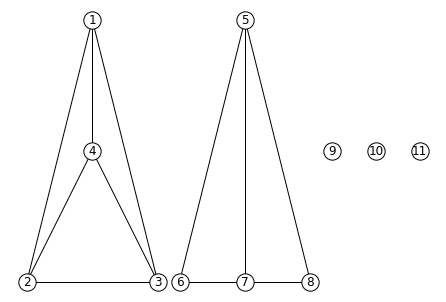

In [6]:
my_pos = {
    1:(-7,10),
    2:(-10,-10),
    3:(-4,-10),
    4:(-7,0),
    5:(0,10),
    6:(-3,-10),
    7:(0,-10),
    8:(3,-10),
    9:(4,0),
    10:(6,0),
    11:(8,0)
}
nx.draw(g,with_labels=True,pos = my_pos,font_color='black', node_color = 'white', edgecolors = 'black')
plt.savefig("graph_in_order.png", format = 'png' )
plt.show()
plt.close()

#4

In [7]:
subgraphs = [g.subgraph(c).copy() for c in nx.connected_components(g)]
for component in subgraphs:
    print(f"For connected component number {subgraphs.index(component)+1}:")
    print(f"Radius is {nx.radius(component)}, diameter is {nx.diameter(component)}")
    print(f"Number of nodes:{str(component.number_of_nodes())}; Number of edges:{str(component.number_of_edges())}")
    for el in list(component.nodes()):
        print (f"Node {el}: degree is {nx.degree(component, el)}, eccentricity is {nx.eccentricity(component, el)}")
    print('\n')

For connected component number 1:
Radius is 1, diameter is 1
Number of nodes:4; Number of edges:6
Node 1: degree is 3, eccentricity is 1
Node 2: degree is 3, eccentricity is 1
Node 3: degree is 3, eccentricity is 1
Node 4: degree is 3, eccentricity is 1


For connected component number 2:
Radius is 1, diameter is 2
Number of nodes:4; Number of edges:5
Node 8: degree is 2, eccentricity is 2
Node 5: degree is 3, eccentricity is 1
Node 6: degree is 2, eccentricity is 2
Node 7: degree is 3, eccentricity is 1


For connected component number 3:
Radius is 0, diameter is 0
Number of nodes:1; Number of edges:0
Node 9: degree is 0, eccentricity is 0


For connected component number 4:
Radius is 0, diameter is 0
Number of nodes:1; Number of edges:0
Node 10: degree is 0, eccentricity is 0


For connected component number 5:
Radius is 0, diameter is 0
Number of nodes:1; Number of edges:0
Node 11: degree is 0, eccentricity is 0




#5

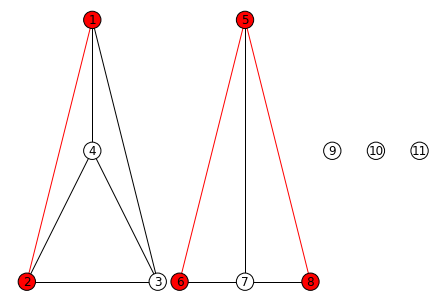

In [8]:
dims_edges = []
dims_nodes = []
for connected_comp in nx.connected_components(g):
    subgraph = nx.subgraph(g, connected_comp)
    nodes = [node for (node, ecc) in nx.eccentricity(subgraph).items() if ecc == nx.diameter(subgraph)]
    start = nodes[0]
    for node in nodes[1:]:
        if nx.shortest_path_length(subgraph, start, node) == nx.diameter(subgraph):
            nodes = nx.shortest_path(subgraph, start, node)
            edges = [(n1, n2) for n1, n2 in zip(nodes, nodes[1:])]
            dims_edges.extend(edges)
            dims_nodes.extend(nodes)
            break

edge_color = ['red' if edge in dims_edges or edge[::-1] in dims_edges else 'black' for edge in g.edges]
node_color = ['red' if node in dims_nodes else 'white' for node in g.nodes]


nx.draw(g, edge_color=edge_color, node_color=node_color, pos = my_pos, with_labels=True, font_color='black', edgecolors = 'black')
plt.show()

#6

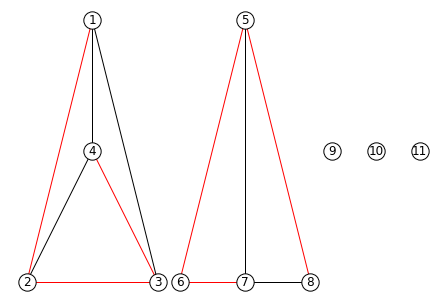

In [10]:
forest = []
for connected_comp in nx.connected_components(g):
    subgraph = nx.subgraph(g, connected_comp)
    forest_edges = nx.dfs_edges(subgraph)
    forest.extend(forest_edges)

edge_color = ['red' if edge in forest or edge[::-1] in forest else 'black' for edge in g.edges]


nx.draw(g, edge_color=edge_color, pos = my_pos, with_labels=True, font_color='black', edgecolors = 'black', node_color = 'white')
plt.show()